# HW2

### due on 4/23/2017 at 11:59 pm

<b>Instructions:</b> Write your answers in the empty code cells below.

<b>Penalties:</b> You will incur penalties if:
<ul>
<li>Your code is wrong</li>
<li>Your code does not work on different data</li>
<li>You use loops (unless explicitly permitted)</li>
</ul>

## Problem

Start by executing the following code, which creates a Series object <b>stock</b> of share prices of Apple. 

In [77]:
import pandas as pd
import pandas_datareader.data as web # if this line gives you an error, install pandas_datareader
import datetime    
ticker = 'AAPL'

start = datetime.datetime(1990, 7, 1)
end = datetime.datetime(2017, 4, 17)
df = web.DataReader(ticker, 'google', start, end)

dates = []
for x in range(len(df)):
    # get the dates from the index
    newdate = str(df.index[x])
    # strip out the timestamp to get only the date
    newdate = newdate[0:10]
    dates.append(newdate)
df['dates'] = dates

# Create a Series called stock
stock = df.Close
stock.name = ticker

In [78]:
print len(stock)
print stock.head(10)
print stock.tail(10)

4000
Date
2001-05-21    1.68
2001-05-22    1.68
2001-05-23    1.66
2001-05-24    1.66
2001-05-25    1.63
2001-05-29    1.53
2001-05-30    1.41
2001-05-31    1.42
2001-06-01    1.49
2001-06-04    1.48
Name: AAPL, dtype: float64
Date
2017-04-03    143.70
2017-04-04    144.77
2017-04-05    144.02
2017-04-06    143.66
2017-04-07    143.34
2017-04-10    143.17
2017-04-11    141.63
2017-04-12    141.80
2017-04-13    141.05
2017-04-17    141.83
Name: AAPL, dtype: float64


Populating the interactive namespace from numpy and matplotlib


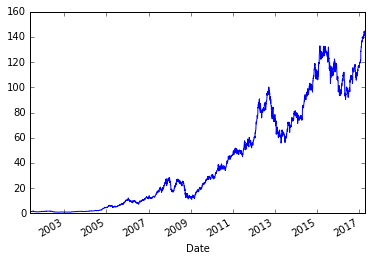

In [79]:
%pylab inline
stock.plot()

### Question 1


What was the price on Jan 29, 2016?

In [80]:
float(stock['2016-01-29'])

97.34

### Question 2

Show the price increase (in % compared to the previous trading day) in those trading days whose closing price was at least 10% higher than the previous day's closing price. Your result should be a Series of (trading day, price increase)

Find the percent increase for a particular day compared to the previous day

In [83]:
percent_increase = ((stock - stock.shift(1)) / stock.shift(1)) * 100

Find the trading days whose closing price was at least 10% higher than previous day's closing price

In [84]:
percent_increase[percent_increase >= 10]

Date
2003-05-05    11.650485
2004-07-15    11.374408
2004-10-14    13.028169
2004-11-22    11.167513
2006-07-20    11.772316
2007-11-13    10.514338
2008-10-13    14.130435
2008-11-24    12.542373
Name: AAPL, dtype: float64

### Question 3

In which days did we observe a price increase of at least 25% from any of the most recent 9 trading sessions? Report your result as a Series (d,gain) where <i>d</i> is the trading day when such increase was observed and <i>gain</i> is the maximum percentage gain (%) observed over the 9 trading days preceding trading day <i>d</i>. <i>Hint:</i> use a rolling minimum

Find the rolling min over the 9 trading days preceding trading day.Before this, we need to shift(1) so that the current date is not conisdered while finding the rolling min.

In [85]:
rollingmin = stock.shift(1).rolling(9).min()

Finf the percentage of price increase on a particular day compared to the previous 9 trading days(rolling min has the minimum value already)

In [86]:
percent_increase = ((stock - rollingmin)/rollingmin) * 100

Find the days when the percentage increase is atleast 25%

In [87]:
percent_increase[percent_increase >= 25]

Date
2003-05-06    31.578947
2003-05-07    32.631579
2003-05-08    35.789474
2003-05-09    32.323232
2003-05-12    33.000000
2003-05-13    30.392157
2003-05-14    28.155340
2003-05-15    30.097087
2006-07-26    25.966851
2006-07-27    25.138122
2006-07-28    25.267380
2006-07-31    28.439153
Name: AAPL, dtype: float64

### Question 4 (hard)

What was the worst possible "buy&sell" operation? Find the two trading days x and y so that the % loss resulting from buying in x and selling in y (with y > x) is maximized. Your code should work for any other stock. <i>Hint:</i> the method <b>cummin</b> returns the minimum value encountered so far.

In [91]:
"""
If we buy the stock today, find the cumulative min from tomorrow to the end of the series to find the min sell price
Since cummin is for data seen so far, we sort the series in reverse order by index, shift it by 1 to not include current day
price for selling and then find the cummin for each date
We then sort the series back to the original order
minSell contains the cumulative min value from that point (exclusive) to the end of the series
"""
minSell = stock.sort_index(ascending=False).shift(1).cummin().sort_index()

In [92]:
# We calculate the loss from buying the stock on the current date and selling the stock at the corresponding minSell price
# The minSell price is at a future date
loss = ((minSell - stock)/stock) * 100

In [93]:
buyDate = loss.idxmin()
maxLoss = loss.min()
sellValue = minSell[buyDate]
buyValue = stock[buyDate]
sellDate = str(stock[stock == sellValue].index[0])[0:10]
#print str(buyDate)[0:10], maxLoss, sellValue, buyValue, sellDate
print "The worst day to buy was %s, when the price was $%0.2f, and the worst day to sell was %s \nwhen the price was $%0.2f. \
The loss of this buy/sell transaction is %0.2f%%." % (str(buyDate)[0:10],buyValue,sellDate,sellValue,maxLoss)

The worst day to buy was 2007-12-28, when the price was $28.55, and the worst day to sell was 2009-01-20 
when the price was $11.17. The loss of this buy/sell transaction is -60.88%.
